# COGS 118B - Final Project

# Predictive Policing: Leveraging Machine Learning to Forecast Urban Crime

## Group members

- Daniel Kong
- Yuri Reyes

# Abstract 

The goal of this project is to develop a predictive model for crime rates in Chicago, Illinois, using the Chicago Crime Data dataset available on Kaggle. The dataset includes over 6,000,000 records of reported incidents from 2001 to the present, all from the Chicago Police Department's CLEAR system. We aim to analyze the relationship between various factors such as demographic characteristics, geographical locations, and law enforcement resources, and the incidence of different types of crimes. We will utilize machine learning techniques, including Random Forest Regression and Q-learning, to model crime rates and explore optimal resource allocation strategies for law enforcement agencies. Performance will be evaluated using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R^2) score for regression tasks.



# Background

The Chicago Crime Data dataset provides detailed information about reported crimes in Chicago, including the type of crime, location, date, and other relevant attributes. Previous research in criminology and urban studies has highlighted the importance of understanding the underlying patterns and factors influencing crime rates in urban areas. Machine learning techniques offer promising avenues for analyzing large-scale crime data and identifying actionable insights for law enforcement agencies. These algorithms can be exploited as shown by Weisburd and Braga (2006) as they review the effectiveness of hot spots policing. Furthermore, Bowers et al. (2004) highlights the potential of perspective hot-spotting in crime mapping. 

# Problem Statement

The problem we aim to address is the prediction of crime rates in Chicago based on various socio-demographic factors, geographical characteristics, and law enforcement resources. By developing a predictive model, we seek to identify key determinants of crime rates and explore effective strategies for resource allocation to mitigate criminal activities. The problem is well-defined and quantifiable, with the goal of maximizing the performance of the predictive model and optimizing law enforcement efforts.


# Data


We will use two datasets for this project **[Chicago Crime Dataset](https://www.kaggle.com/datasets/currie32/crimes-in-chicago)** on Kaggle for this project
- This dataset has over 6 million observations and 22 variables/datapoints
- Each observation as a reported crime in which its attributes, such as type, data and time, or description, are the datapoints/variables
- Special handling and preprocessing steps may be required to clean and prepare the data for analysis, including handling missing values and encoding categorical variables.


# Proposed Solution

We will employ machine learning techniques, including Random Forest Regression and Q-learning, to model crime rates and explore optimal resource allocation strategies for law enforcement agencies. The Random Forest Regression model will be used to predict crime rates based on socio-demographic factors and geographical features. Additionally, we will implement a Q-learning algorithm to learn optimal resource allocation policies for law enforcement agencies, considering the dynamic nature of crime patterns.

This report is reproducible as we used Python libraries like scikit-learn for the implementation of the models and for fine tuning. Our group also used grid search for hyperparameter optimization to improve performance of the model. A benchmark model, in this case the logistic regression was used to provide insight on the effectiveness of the ensemble methods. 

# Evaluation Metrics

Performance will be evaluated using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R^2) score for regression tasks. These metrics will provide insights into the accuracy and predictive power of the models developed. Additionally, we will assess the effectiveness of resource allocation strategies using appropriate evaluation criteria, such as crime reduction rates and allocation efficiency. This will provide a comprehensive assessment of the model performance.

# Ethics and Privacy

Given the sensitive nature of crime data, ethical considerations regarding data privacy and potential biases must be carefully addressed. We will adhere to ethical guidelines and data privacy regulations when handling and analyzing the dataset. Furthermore, we will consider potential biases in the data and take steps to mitigate them, ensuring fairness and equity in our analysis. Another issue comes from the ethical use of predictions. These predictive models must be managed carefully to properly avoid severe underlying issues such as profiling or discrimination. 



# Data Processing

To start, let us import the libraries and load in the dataset

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Now let us load in the 4 individual datasets

In [22]:
folder_path = 'crime_data'
file_list = os.listdir(folder_path)
csv_files = [file for file in file_list if file.endswith('.csv')]

dataframes = []

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)
    
crime_data = pd.concat(dataframes, ignore_index=True)

crime_data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11039140,JA371686,01/01/2010 12:00:00 AM,055XX W FARRAGUT AVE,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,...,45.0,11.0,02,NaN,NaN,2010,08/02/2017 03:54:51 PM,NaN,NaN,NaN
1,10342825,HY533211,01/01/2010 12:00:00 AM,056XX W EASTWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,45.0,15.0,20,1137897.0,1930354.0,2010,02/10/2018 03:50:01 PM,41.965032,-87.768376,"(41.96503178, -87.768375694)"
2,10938629,JA251783,01/01/2010 12:00:00 AM,043XX N MONTICELLO AVE,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,...,33.0,16.0,02,NaN,NaN,2010,05/09/2017 03:54:21 PM,NaN,NaN,NaN
3,11262896,JB194570,01/01/2010 12:00:00 AM,057XX N ROCKWELL ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,OTHER,True,False,...,40.0,2.0,02,NaN,NaN,2010,10/22/2019 04:01:10 PM,NaN,NaN,NaN
4,11875312,JC490052,01/01/2010 12:00:00 AM,017XX W 48TH ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,False,False,...,15.0,61.0,17,NaN,NaN,2010,10/29/2019 03:51:02 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590209,12915874,JF502169,12/07/2022 11:50:00 PM,040XX W 59TH ST,0860,THEFT,RETAIL THEFT,TAVERN / LIQUOR STORE,False,False,...,23.0,65.0,06,1150629.0,1865174.0,2022,12/14/2022 03:49:33 PM,41.785931,-87.723266,"(41.785930664, -87.723266186)"
590210,12915875,JF502171,12/07/2022 11:51:00 PM,044XX S DREXEL BLVD,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,False,True,...,4.0,39.0,04B,1182936.0,1875860.0,2022,12/14/2022 03:49:33 PM,41.814564,-87.604481,"(41.814563821, -87.604481355)"
590211,12917956,JF502185,12/07/2022 11:52:00 PM,009XX N LAWNDALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,27.0,23.0,08B,1151546.0,1905984.0,2022,12/14/2022 03:49:33 PM,41.897901,-87.718833,"(41.897900553, -87.718833412)"
590212,12915844,JF502180,12/07/2022 11:58:00 PM,013XX W 73RD ST,2091,NARCOTICS,FORFEIT PROPERTY,STREET,True,False,...,6.0,67.0,18,1168578.0,1856355.0,2022,12/14/2022 03:49:33 PM,41.761362,-87.657710,"(41.761361892, -87.657710237)"


### Cleaning and Processing the data

First, let us make sure the data is clean and processed for analysis

In [23]:
crime_rate_data = crime_data.groupby(['Community Area', 'Primary Type']).size().unstack(fill_value=0).reset_index()

# Normalize crime counts to create crime rates (using raw counts in this example)
crime_rate_data.set_index('Community Area', inplace=True)

## Modeling

Now to use a RandomForestRegressor to model the data for crime rate or frequency by crime type

In [24]:
# Prepare the dataset for the RandomForestRegressor
features = crime_rate_data.copy()  # Features include all crime types
labels = crime_rate_data.mean(axis=1)  # Example target: mean crime rate across types

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [26]:
# Train a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Q-Learning

Now, let us implement an environment for an agent to utilize q-learning regarding our crime data

- The q-learning is trained over a number of episodes which can be changed in the q-learning algorithm parameters

In [27]:
class CrimeEnvironment:
    def __init__(self, crime_rate_data, model):
        self.crime_rate_data = crime_rate_data
        self.model = model
        self.state = None  # Represents the current state
        self.actions = ['allocate_low', 'allocate_medium', 'allocate_high']  # Resource allocation levels
        self.num_states = len(crime_rate_data)  # Number of states (community areas)
        self.num_actions = len(self.actions)  # Number of possible actions
        self.q_table = np.zeros((self.num_states, self.num_actions))  # Initialize Q-table with zeros
    
    def select_action(self):
        # Select action using epsilon-greedy policy
        epsilon = 0.1  # Exploration-exploitation trade-off parameter
        if np.random.uniform(0, 1) < epsilon:
            return np.random.choice(self.actions)  # Explore
        else:
            return self.actions[np.argmax(self.q_table[self.state])]  # Exploit
    
    def take_action(self, action):
        # Simulate the effect of taking an action in the environment
        # Update state and return reward
        
        # Get the current crime rates for the current state
        current_crime_rates = self.crime_rate_data.iloc[self.state].values.reshape(1, -1)
        
        # Predict the crime rate before and after taking action
        predicted_crime_rate_before = self.model.predict(current_crime_rates)[0]
        
        # Example logic to update the state and calculate the reward
        if action == 'allocate_low':
            crime_reduction = np.random.uniform(0, 0.1)  # Low resource allocation leads to small reduction
        elif action == 'allocate_medium':
            crime_reduction = np.random.uniform(0.1, 0.3)  # Medium resource allocation leads to moderate reduction
        else:  # 'allocate_high'
            crime_reduction = np.random.uniform(0.3, 0.5)  # High resource allocation leads to significant reduction
        
        new_crime_rates = current_crime_rates * (1 - crime_reduction)
        self.crime_rate_data.iloc[self.state] = new_crime_rates[0]  # Update the crime rates in the dataset
        
        predicted_crime_rate_after = self.model.predict(new_crime_rates)[0]
        reward = predicted_crime_rate_before - predicted_crime_rate_after  # Reward is the reduction in predicted crime rate
        new_state = (self.state + 1) % self.num_states  # Example: move to the next state in a cyclic manner
        
        return new_state, reward
    
    def update_q_table(self, state, action, reward, new_state):
        # Update Q-value using Q-learning update rule
        alpha = 0.1  # Learning rate
        gamma = 0.9  # Discount factor
        max_future_q = np.max(self.q_table[new_state])
        current_q = self.q_table[state, self.actions.index(action)]
        new_q = (1 - alpha) * current_q + alpha * (reward + gamma * max_future_q)
        self.q_table[state, self.actions.index(action)] = new_q

Now to initialize and train the agent for q-learning

In [28]:
env = CrimeEnvironment(crime_rate_data, rf_model)

Now to define the q-learning algorithm

In [29]:
def q_learning(env, num_episodes=1000):
    for episode in range(num_episodes):
        env.state = np.random.randint(0, env.num_states)  # Initialize state randomly
        step_count = 0
        while step_count < 100:  # Example termination condition: 100 steps per episode
            action = env.select_action()
            new_state, reward = env.take_action(action)
            env.update_q_table(env.state, action, reward, new_state)
            env.state = new_state
            step_count += 1

In [30]:
import warnings
warnings.filterwarnings('ignore')

q_learning(env)

Now to visualize the results and the q-table

[[0.10248307 0.10213408 0.10286716]
 [0.10126297 0.10164458 0.10083123]
 [0.10030632 0.09990914 0.10063965]
 [0.09969959 0.09940597 0.09891151]
 [0.09805399 0.09834178 0.09755471]
 [0.09670644 0.09718833 0.09565932]
 [0.09508605 0.09551691 0.09482555]
 [0.09341379 0.09302437 0.09380649]
 [0.09173649 0.09127355 0.09199155]
 [0.08983365 0.09010272 0.09032263]
 [0.08840571 0.0889936  0.08866084]
 [0.08802978 0.08786925 0.08655728]
 [0.08550753 0.08589045 0.08621335]
 [0.08473987 0.08429288 0.08437036]
 [0.08426175 0.08359079 0.08389099]
 [0.08367311 0.08393521 0.08337194]
 [0.08360489 0.08328541 0.08381744]
 [0.08356006 0.08406349 0.08384488]
 [0.08420564 0.08472526 0.08442325]
 [0.0851255  0.08532616 0.0855987 ]
 [0.08664252 0.08564528 0.08697222]
 [0.08773027 0.08737722 0.08718267]
 [0.08871898 0.08803783 0.08834004]
 [0.08889259 0.0891669  0.08947408]
 [0.08999558 0.08956297 0.08976283]
 [0.09000032 0.09047229 0.09015299]
 [0.09040718 0.09102265 0.09073678]
 [0.0908648  0.09117351 0.09

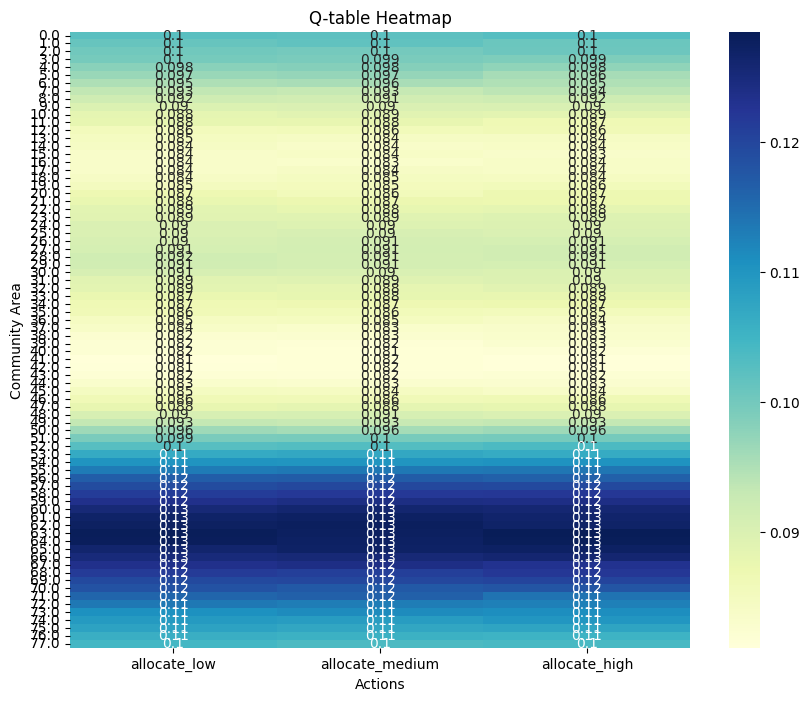

In [31]:
print(env.q_table)

plt.figure(figsize=(10, 8))
sns.heatmap(env.q_table, annot=True, cmap="YlGnBu", xticklabels=env.actions, yticklabels=crime_rate_data.index)
plt.title("Q-table Heatmap")
plt.xlabel("Actions")
plt.ylabel("Community Area")
plt.show()

# Results

The main point of the analysis is to showcase how the RandomForestRegressor works to predict crime rates in different community areas of Chicago. Additionally, Q-learning can be used to optimize resouce use to help react and reduce the crime rate.

### Subsection 1: Data Preprocessing

We combined four datasets containing the crime rate from 2001 to the present into a single data frame. We then grouped the data into 'Community Area and 'Primary Type' to keep count of the number of crimes. This was normalized to help represent the crime rates. As seen before, the dataset were sucessfully merged allowing there to be 6 million rows.

### Subsection 2: Feature Engineering and Dataset Preparation 

Our group created a data fram with crime rates normalized by community area and crime type. We used the data to prepae the dataset for training the RandomForestRegressor model. We found that the crime rate data was normalized and now allows us to see the distribution of crime across community areas.

### Subsection 3: Model Evaluation

Our group implemented a RandomForestRegressor model to predict crime rates and evaluted its performance. This was achieved with the use of standards metrics. The RandomForestRegressor model displayed a severe issue as the MAE and MSE are very lw and the R^2 is negatively high. 
- MAE: 3.830699534500319e-113
- MSE: 1.467426075492677e-225
- R^2 Score: -8013003.000758651

### Subsection 4: Q-Learning for Resource Allocation

We used Q-learning to simulate and optimize resouce placement and need to reduce the crime rate in Chicago. Through this, we learned that the Q-learning algorithm is effective in learning a policy to put proper resouce placement. The heatmap table helps vizulaize the value of each action for different areas. 


# Discussion

### Interpreting the result

Based on the findings of the data, our group found that the RandomForestReressor model and Q-learning is an approach to predicting and mitigating crime rates in different community areas of Chicago. However, our results reveal significant limitations in the model's effectiveness as our metrics have a really low error and a very high negative R^2 score.

The MAE and MSE were very low and the R^2 scores was very negative. This could be a result of improper data preprocessing errors or model misconfigurations. However, it could also suggest that the data and model setup would need to be double checked. Additionally, the Q-learning model demonstrated a structured approach to evaluating resource placements. This vizualization of the impacts of resource placemet could help shape efffective policies.

### Limitations

A limitation could be the data quality and preparation. The results suggest that the model perforance requres proper data cleaning and prep to ensure reliable predictions. A way to combat this limitation would be to ensure data integrity with adaquate research and conduct further exploration to enhance model accuracy and effectiveness. In addition, another limitation could be the model's complexity and hyperparameter tuning. The model was used in the default setttings. Therefore, the exploration of hyperparameters and alternative models are necessary to help aid performance.  

### Ethics & Privacy

These predictive models can hold dangerous biases and can unfairly target the specific communities. It is our responsibility to ensure fairness and transparancy when developing and shaping these models. Bias mitigation can be used to to help aid in the prevention of discrimination. Furthermore, the data must protected as individual's privacy is at risk. The data must comply to protection regulations. A way to combat this issue would be to make the data anonymous and place strict data policies to help protect privacy.

### Conclusion

The use of predictive and informative models and Q-learning are a bit of a challenge to use. However, the Q-learnign framework allows the optimization of resource placement strategy development. These tools can effectively help the Chicago police and other counties to ensure saftey to their residents. In the future, an improvement that can be made could be the quality of the data, refining model selection, and lastly, addressing ethical concerns to enure fair and accurate implementation. We hope our report can provide insight on just a single application of RandomForestRegressor models and Q-Learning models. 

# Footnotes
<a name="weisburdnote"></a>1.[^](#weisburd): Weisburd, D., & Braga, A. A. (2006). *Hot Spots Policing as a Model for Police Innovation.* Policing: A Journal of Policy and Practice, 1(2), 33-49.<br>
<a name="bowersnote"></a>2.[^](#bowers): Bowers, K. J., Johnson, S. D., & Pease, K. (2004). *Prospective Hot-Spotting: The Future of Crime Mapping?.* British Journal of Criminology, 44(5), 641-658.<br>

